### Data Exploration

In [20]:
import warnings
warnings.filterwarnings("ignore")

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [22]:
import pandas as pd

df = pd.read_csv('SpotifyFeatures.csv')

In [23]:
# 1. Explore Data Overview
print("Overview of the dataset:")
print(df.info())  # Display data structure information

print("\nStatistical summary of numerical data:")
print(df.describe())  # Show statistical summary of numerical columns


Overview of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232724 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64


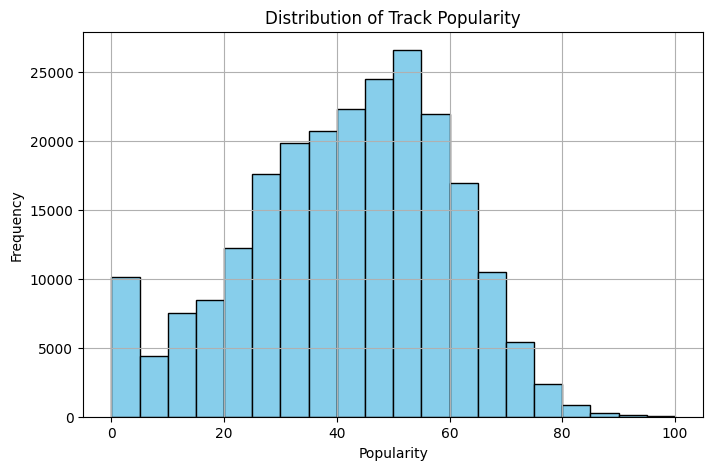

In [24]:
# 2. Analyze the Distribution of Popularity (Rating)
plt.figure(figsize=(8, 5))
df['popularity'].hist(bins=20, color='skyblue', edgecolor='black')  # Plot distribution of 'popularity'
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.title('Distribution of Track Popularity')
plt.show()


In [25]:
# 3. List of Columns with Missing Values
# Identify the number of missing values in each column
missing_values = df.isnull().sum()

# Filter columns that have missing values (if any)
missing_columns = missing_values[missing_values > 0]

# Display the list of columns with missing values and their counts
if not missing_columns.empty:
    print("\nList of columns with missing values and their count:")
    print(missing_columns)
else:
    print("\nNo columns have missing values.")



List of columns with missing values and their count:
track_name    1
dtype: int64


### Data Analysis

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# 1. Data Analysis and Description
# Count unique values in each categorical column
for column in df.select_dtypes(include='object').columns:
    print(f"\nUnique values in column {column}:")
    print(df[column].value_counts().head())

# Analyze trends in the data
print("\nDescriptive statistics for numerical columns:")
print(df.describe())


Unique values in column genre:
genre
Comedy        9681
Soundtrack    9646
Indie         9543
Jazz          9441
Pop           9386
Name: count, dtype: int64

Unique values in column artist_name:
artist_name
Giuseppe Verdi            1394
Giacomo Puccini           1137
Kimbo Children's Music     971
Nobuo Uematsu              825
Richard Wagner             804
Name: count, dtype: int64

Unique values in column track_name:
track_name
Home       100
You         71
Intro       69
Stay        63
Wake Up     59
Name: count, dtype: int64

Unique values in column track_id:
track_id
0UE0RhnRaEYsiYgXpyLoZc    8
0wY9rA9fJkuESyYm9uzVK5    8
3R73Y7X53MIQZWnKloWq5i    8
3uSSjnDMmoyERaAK9KvpJR    8
6AIte2Iej1QKlaofpjCzW1    8
Name: count, dtype: int64

Unique values in column key:
key
C     27583
G     26390
D     24077
C#    23201
A     22671
Name: count, dtype: int64

Unique values in column mode:
mode
Major    151744
Minor     80981
Name: count, dtype: int64

Unique values in column time_signatu

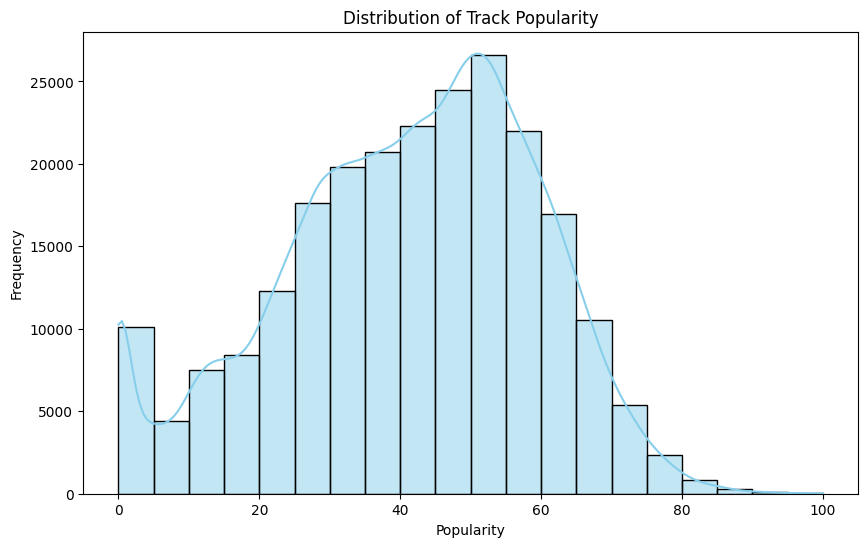

In [27]:
# Distribution plot for some numerical attributes
plt.figure(figsize=(10, 6))
sns.histplot(df['popularity'], bins=20, kde=True, color='skyblue')
plt.title("Distribution of Track Popularity")
plt.xlabel("Popularity")
plt.ylabel("Frequency")
plt.show()


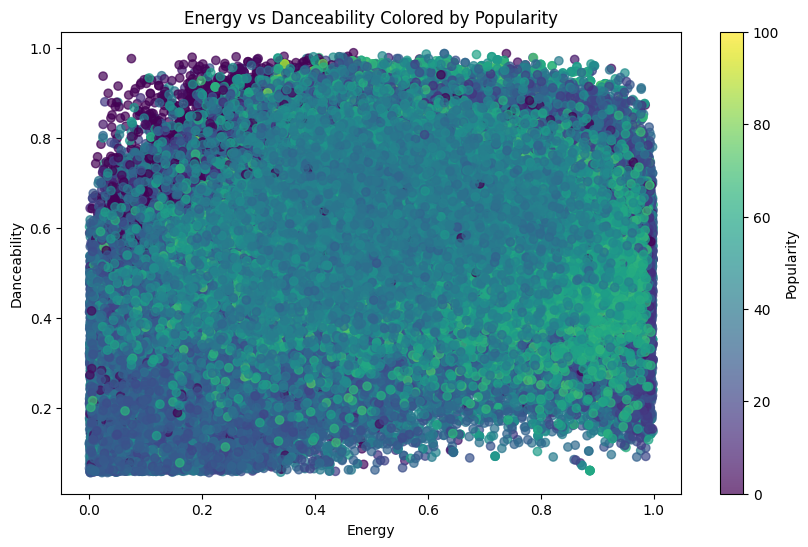

In [28]:
# Scatter plot between Energy and Danceability with color representing Popularity
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['energy'], df['danceability'], c=df['popularity'], cmap='viridis', alpha=0.7)
plt.xlabel("Energy")
plt.ylabel("Danceability")
plt.title("Energy vs Danceability Colored by Popularity")
plt.colorbar(scatter, label='Popularity')  # Use the scatter object to create the color bar
plt.show()


In [29]:
# 2. Check for Missing Data
missing_values = df.isnull().sum()
print("\nNumber of missing values in each column:")
print(missing_values[missing_values > 0])



Number of missing values in each column:
track_name    1
dtype: int64


In [ ]:
# If there are only a few mthem with 'Unissing values in 'track_name', replace known'
df['track_name'].fillna('Unknown', inplace=True)


In [31]:
# Recheck to ensure no missing values remain
print("\nConfirming no missing values in the dataset:")
print(df.isnull().sum())



Confirming no missing values in the dataset:
genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64


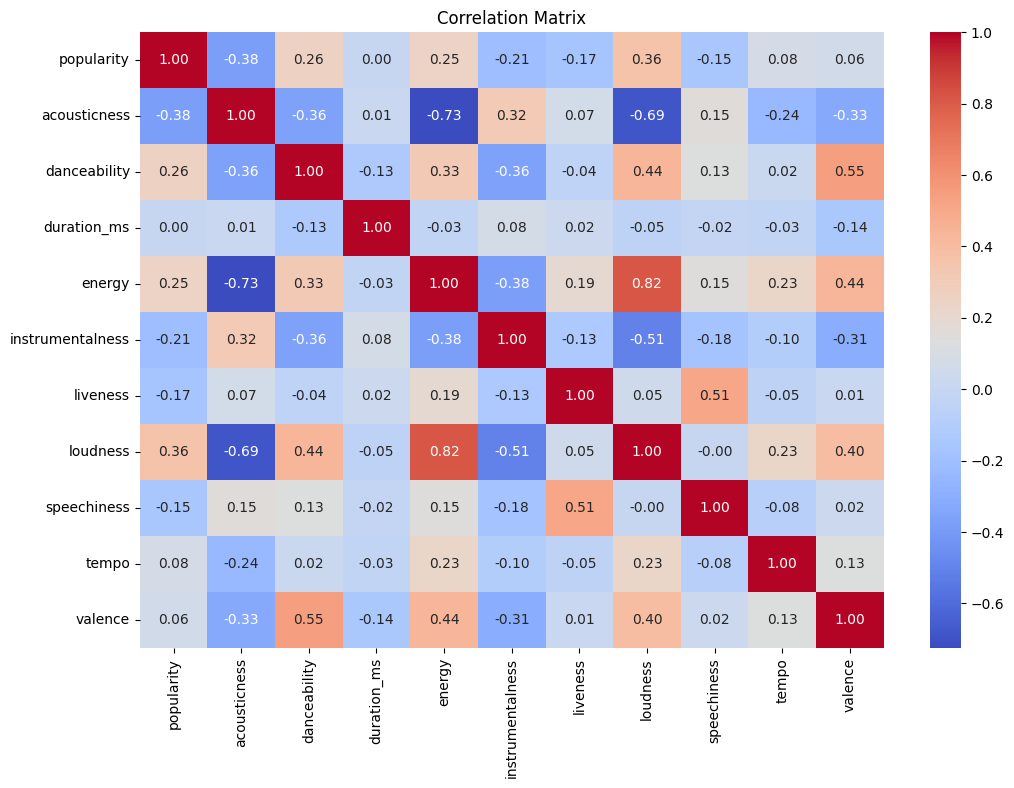

In [32]:
# 3. Relationship Between Attributes
# Select only numerical columns to compute the correlation matrix
numeric_df = df.select_dtypes(include='number')

# Compute the correlation matrix and plot a heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


### Data Preprocessing

In [36]:
# 1. Data Normalization (Scaling)
from sklearn.preprocessing import MinMaxScaler

# Normalize numerical attributes
scaler = MinMaxScaler()  # You can replace this with StandardScaler()
scaled_columns = ['popularity', 'energy', 'danceability', 'acousticness']
df[scaled_columns] = scaler.fit_transform(df[scaled_columns])

print("Data after normalization:\n", df[scaled_columns].head())


Data after normalization:
    popularity    energy  danceability  acousticness
0        0.00  0.910909      0.356292      0.613454
1        0.01  0.737732      0.571934      0.246988
2        0.03  0.131113      0.650252      0.955823
3        0.00  0.326313      0.196438      0.705823
4        0.04  0.225209      0.294067      0.953815


In [37]:
# 2. Handling Missing Values
if df.isnull().sum().sum() > 0:
    df.dropna(inplace=True)  # Remove rows with missing values
    print("Data after handling missing values:\n", df.isnull().sum())
else:
    print("No missing values in the dataset.")


No missing values in the dataset.
